In [58]:
import tensorflow
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

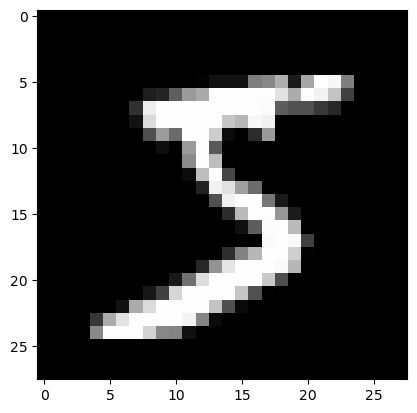

In [64]:
plt.imshow(x_train[0], cmap="gray")

In [66]:
y_train[0]

5

In [68]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [70]:
# converting it in the range of 0 to 1

x_train = x_train/255
x_test = x_test/255

In [72]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [74]:
# reshaping the training and testing data from 2D to 1D

#x_train = x_train.reshape((x_train.shape[0], 1*28*28))
#x_test = x_test.reshape((x_test.shape[0], 1*28*28))

In [76]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [78]:
model = Sequential()

In [110]:
#first layer
model.add(Dense(768, input_shape=(None, None, 1, 28, 28), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#last layer
model.add(Dense(10, activation='sigmoid'))


In [111]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, None, 1, 28, 256   7424      
                             )                                   
                                                                 
 dense_21 (Dense)            (None, None, 1, 28, 128   32896     
                             )                                   
                                                                 
 dense_22 (Dense)            (None, None, 1, 28, 32)   4128      
                                                                 
 dense_23 (Dense)            (None, None, 1, 28, 10)   330       
                                                                 
 dense_24 (Dense)            (None, None, 1, 28, 256   2816      
                             )                                   
                                                      

In [113]:
trained_MNIST = model.fit(x_train, y_train, validation_split = 0.1, epochs=30)

Epoch 1/30


ValueError: in user code:

    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, None, 1, 28, 28), found shape=(None, 28, 28)


In [95]:
test_loss, accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(accuracy)

ValueError: in user code:

    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, None, 1, 28, 28), found shape=(None, 28, 28)


In [96]:
y_pred = model.predict(x_test)

ValueError: in user code:

    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ANANYAPRANAV\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, None, 1, 28, 28), found shape=(None, 28, 28)


In [18]:
y_pred

array([[4.8433575e-01, 9.1211176e-01, 9.9968565e-01, ..., 1.0000000e+00,
        6.0380298e-01, 9.9517077e-01],
       [3.8975421e-02, 9.9994785e-01, 1.0000000e+00, ..., 2.9562625e-01,
        9.1921580e-01, 3.7499870e-08],
       [9.3137696e-03, 9.9991947e-01, 4.8669910e-01, ..., 7.1356171e-01,
        9.7148800e-01, 2.7564356e-01],
       ...,
       [4.6502012e-03, 2.4199238e-01, 1.7895749e-03, ..., 9.9974233e-01,
        9.9309963e-01, 9.9884468e-01],
       [5.3012812e-01, 7.5001316e-03, 2.6521666e-04, ..., 2.5259797e-05,
        9.9995303e-01, 4.8189029e-01],
       [9.9714041e-01, 1.5455516e-01, 9.9853951e-01, ..., 1.3574332e-07,
        8.8033968e-01, 1.7213793e-02]], dtype=float32)

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

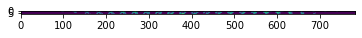

In [29]:
plt.imshow(x_test[0:7])

In [30]:
pred = np.argmax(y_pred, axis=1)

In [22]:
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
print("\n The Classification report is \n")
print(classification_report(y_test, pred))
print("\n The Confusion Matrix is \n")
print(confusion_matrix(y_test, pred))


 The Classification report is 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


 The Confusion Matrix is 

[[ 968    0    0    0    1    2    3    1    4    1]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   4    5 1007    3    2    0    1    6    3    1]
 [   1    0   10  985

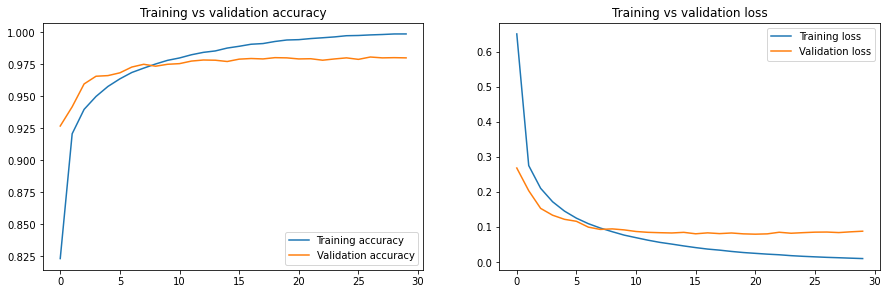

In [24]:
accuracy = trained_MNIST.history['accuracy']
val_accuracy  = trained_MNIST.history['val_accuracy']

loss = trained_MNIST.history['loss']
val_loss = trained_MNIST.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()